In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [2]:
from sklearn import linear_model

# Open data

In [91]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/Data193ss1cregdFF2000pointskfc124Smith0_4_60ICTSmean.mat


In [92]:
Ua=sio.loadmat(filename)
DTmean=Ua['TSmean']
DTmean.shape

(5998, 124)

In [86]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/Data193ss1cregdFF2000pointskfc124Smith0_4_60TS.mat


In [87]:
Ua=sio.loadmat(filename)
Ua

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon May 18 17:28:38 2020',
 '__version__': '1.0',
 '__globals__': [],
 'TSmean': array([[ 0.00462419, -0.00192906, -0.00401846, ..., -0.22109969,
          0.04658391, -0.09784044],
        [-0.00703148,  0.00066512,  0.00804138, ...,  0.00954712,
         -0.09766781, -0.0107842 ],
        [-0.00413306, -0.00226067, -0.00053148, ..., -0.02186651,
          0.33329519,  0.03617307],
        ...,
        [-0.00240816,  0.0016233 , -0.00428275, ..., -0.02984519,
          0.00972758, -0.00192689],
        [ 0.00042061,  0.00063563, -0.00250972, ..., -0.0258686 ,
          0.03893148, -0.00591495],
        [-0.00042135,  0.00051888, -0.00155754, ..., -0.01265668,
          0.01953241, -0.00294408]])}

In [88]:
DT=Ua['TSmean']
DT.shape

(5998, 124)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/Data193ss1cregdFF2000pointskfc124Smith0_4_60IC.nii


In [7]:
img1 = nb.load(filename2)
data = img1.get_data()

C:\Users\aimon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [44]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/GoodICs193.mat


In [45]:
Ua=sio.loadmat(filename)

In [46]:
GoodIC=Ua['GoodIC'][0,:]

In [47]:
data=data[:,:,:,Ua['GoodIC'][0,:]-1]

IndexError: index 27 is out of bounds for axis 3 with size 22

In [12]:
S=data.shape
S

(118, 79, 29, 22)

Z-score

In [77]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [78]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [79]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-1
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [16]:
Dmaps.shape

(118, 79, 29, 22)

In [62]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/193FlailWalkk.mat


In [63]:
Ua=sio.loadmat(filename)

In [64]:
Ua

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 24 14:57:13 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Flailk': array([[0.        ],
        [3.47704835],
        [1.63985313],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]),
 'Leftk': array([[ 0.        ],
        [ 1.82349165],
        [ 3.35812428],
        ...,
        [-0.1702302 ],
        [-0.03907115],
        [ 0.        ]]),
 'Rightk': array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-1.95775991],
        [-2.1987793 ],
        [ 0.        ]]),
 'Straightk': array([[0.        ],
        [1.75311567],
        [3.22852056],
        ...,
        [0.34041835],
        [4.96080312],
        [0.        ]])}

In [65]:
Ua['Flailk'].shape

(6000, 1)

In [66]:
Xk=np.zeros((6000,4))
Xk[:,0]=np.squeeze(Ua['Flailk'])

In [67]:
Xk.shape

(6000, 4)

In [68]:
Xk[:,1]=np.squeeze(Ua['Leftk'])
Xk[:,2]=np.squeeze(Ua['Rightk'])
Xk[:,3]=np.squeeze(Ua['Straightk'])

In [69]:
Xk.shape

(6000, 4)

# Open Masks

In [37]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/193TransformedFlippedseparate.nii


C:\Users\aimon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [38]:
#filenameM='/home/sophie/Downloads/RegionList'
filenameM='C:/Users/aimon/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [39]:
Dmaps.shape

(118, 79, 29, 22)

In [40]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [41]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            #M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(Mapmean[i])

In [42]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J[0])][0]

In [90]:
DT=DT[:,GoodIC-1]

In [93]:
DTmean=DTmean[:,GoodIC-1]

In [52]:
DT.shape

(5998, 22)

In [53]:
Time_fluoICA=np.array(range(0,DT.shape[0]))

In [70]:
Xk=Xk[1:,:]

In [71]:
Xk=Xk[:-1,:]

In [72]:
Xk.shape

(5998, 4)

SLP_R
SMP_R
0
superior lateral protocerebrum


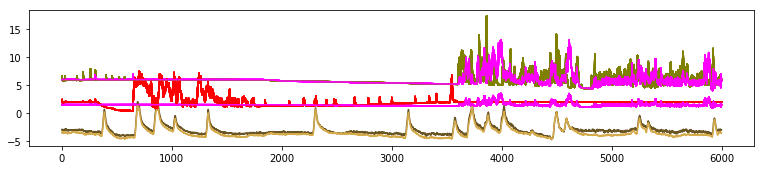

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


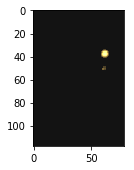

SMP_R
MB_CA_R
SPS_R
SMP_L
15
superior medial protocerebrum


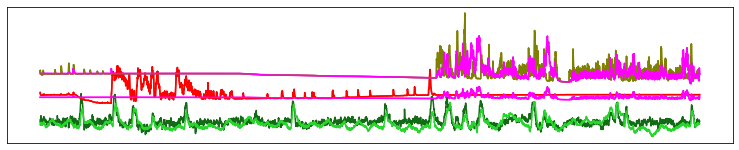

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


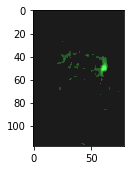

AVLP_R
6
anterior ventrolateral protocerebrum


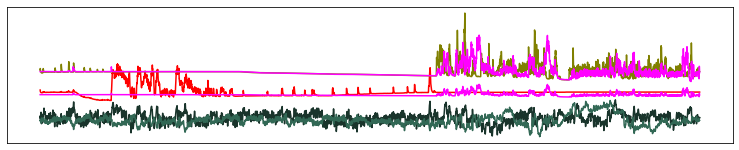

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


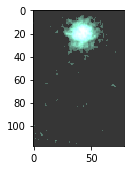

LO_R
SAD
IVLP_R
IPS_R
2
wedge


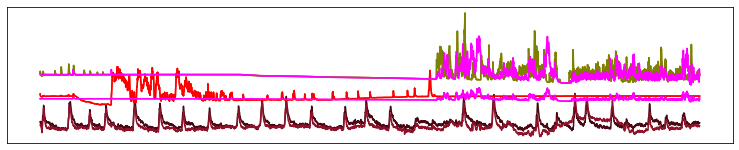

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


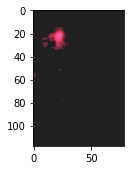

SAD
GNG
AMMC_L
IVLP_L
4
adult gnathal ganglion


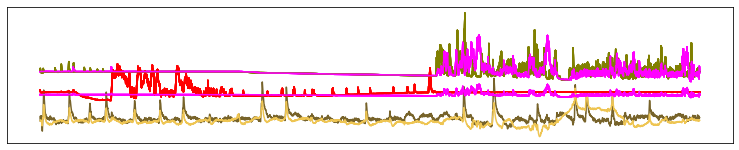

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


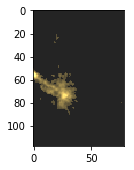

SPS_R
IB_L
SPS_L
16
PB
LO_L
IB_L
ME_L
21
inferior bridge


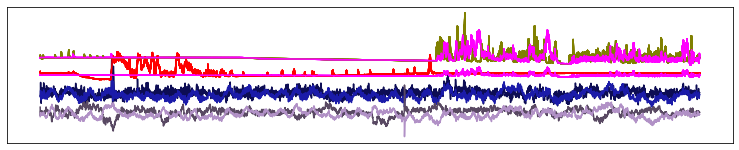

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


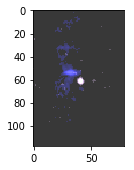

SLP_R
SLP_L
8
superior lateral protocerebrum


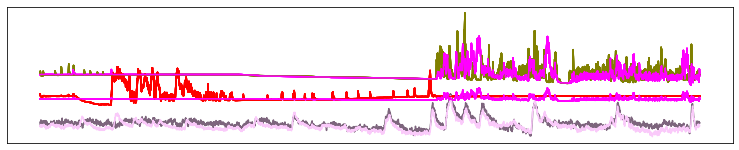

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


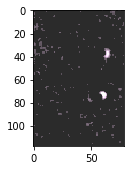

AVLP_L
3
AVLP_L
PVLP_L
5
anterior ventrolateral protocerebrum


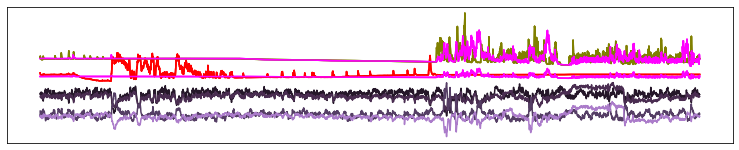

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


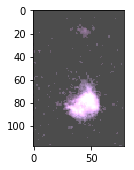

MB_ML_L
AOTU_L
1
anterior optic tubercle


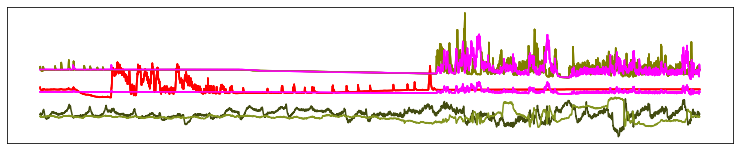

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


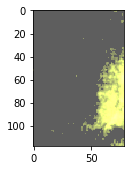

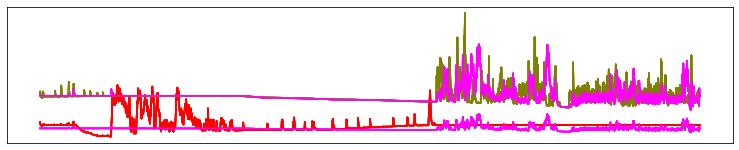

In [96]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0


for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.1*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<400:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.5+Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot(Time_fluoICA,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            plt.plot(Time_fluoICA,(DTmean[:,i]/np.sqrt(np.var(DTmean[:,i]))-h*n+1.5),color=C)        
            
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Time_fluoICA,Xk[:,0]/np.std(Xk[:,0])+2,color=(1,0,0))   
    plt.plot(Time_fluoICA,Xk[:,1]/np.std(Xk[:,1])+6,color=(0.5,0.5,0))
    plt.plot(Time_fluoICA,Xk[:,2]/np.std(Xk[:,2])+6,color=(1,0,1))

    plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        #FM[FM<0.1]=0
        plt.imshow(FM*2,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [134]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [135]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [136]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [137]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [138]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [139]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [140]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [141]:
NewOrder=np.argsort(SmallRegion)

# Individual maps

In [99]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

Z:/GrunwaldKadow_group/Sophie/WalkProject/Trh/193series/193TransformedFlipped.nii


C:\Users\aimon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


(118, 79, 29)

In [100]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [104]:
Percs

array([ 5.6, 11.2, 16.8, 22.4, 28. ])

In [107]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100,interpolation='nearest')
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

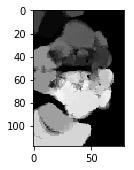

In [108]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [109]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [110]:
algorithm = linear_model.LinearRegression()

In [111]:
Sxk=Xk.shape

In [112]:
Sxk

(5998, 4)

In [116]:
Xk=Xk.T

In [121]:
X=np.zeros((Sxk[0],4))

In [122]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
X[:,2]=(Xk[:,2]-np.mean(Xk[:,2]))/np.std(Xk[:,2])

In [123]:
X[:,3]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])

In [124]:
X.shape

(5998, 4)

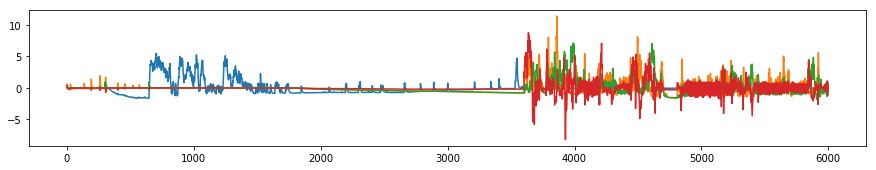

In [125]:
plt.plot(X)

In [136]:
S

(118, 79, 29, 22)

In [ ]:
CompNameAdd.shape

In [ ]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
        D1[D1<0.5]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != ''):
        print(j)
                    #print(i)
        for k in range(86):
            if CompNameAdd[j,k]==1:                
                print(Names[np.array(k)][0])
                
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i]/2, cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        model = algorithm.fit(X, DT[:,j])
        betas = model.coef_
        rsq = model.score(X,DT[:,j])
        print('left:',betas[1],'right:',betas[2],'walk:',betas[3],'flail:',betas[0])
        print(rsq)
        #I=np.argsort(-Scores[:,j])        
            #print(I)
        #print(e[0][I])
        #print(NeuronName[np.int(np.float(e[3][I[0]]))])
        #print(NeuronName[np.int(np.float(e[3][I[1]]))])        
        #ITH=np.argsort(-ScoresTH[:,j])
            #print(I)
        #print(e[0][ITH])
        #print(NeuronName[np.int(np.float(e[3][ITH[0]]))])        
        #print(NeuronName[np.int(np.float(e[3][ITH[1]]))]) 
        
        plt.plot(Time_fluoICA,2*DT[:,j]+4)
        plt.plot(Time_fluoICA,DTmean[:,j]/np.std(DTmean[:,j])+6)
        plt.plot(Time_fluoICA,2*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
        plt.plot(Time_fluoICA,Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,1,0))
        plt.show()
        a=input()
    
    Label_ICs.append(a)


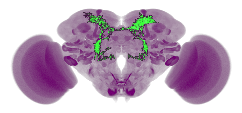

In [270]:
L=[j for j in range(len(Label_ICs)) if Label_ICs[j]=='a']

In [271]:
Good_ICs[L]=1

In [273]:
fn=open('/home/sophie/Desktop/100142GoodICs109.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [274]:
G=Good_ICs.tolist();

# Plot all components together

In [275]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [276]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [316]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
datao=data[:,:,:,NewOrder]
Dmapso=Dmaps[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [278]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

In [279]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['LO_L']
1
['PLP_R']
2
['PLP_R']
3
['SMP_R']
4
['MB_CA_R']
5
['MB_CA_R']
6
['SPS_L']
7
['SLP_L']
8
['SCL_L']
9
['MB_VL_R']
10
['MB_ML_R']
11
['MB_VL_R']
12
['MB_VL_R']
13
['MB_VL_L']
14
['MB_ML_R']
15
['SMP_R']
16
['SMP_R']
17
['SMP_R']
18
['SMP_L']
19
['SMP_L']
20
['CRE_R']
21
['SLP_R']
22
['ICL_R']
23
['PLP_R']
24
['SPS_L']
25
['SMP_R']
26
['ATL_R']
27
['SMP_L']
28
['SMP_R']
29
['PB']
30
['FB']
31
['FB']
32
['EB']
33
['IPS_R']
34
['SPS_L']
35
['IPS_R']


In [293]:
Sets=[0,[1,2,23],[6,7,21,22],[4,5],[8,9,10,11,12,13,14],20,[3,15,16,17,18,19,27,28,25],29,[30,31],32,[33,34,35,24]]

In [305]:
S=datao.shape

In [308]:
S

(155, 102, 29, 109)

In [326]:
for i in range(len(Sets)):
    
    Final_map3=np.zeros([S[0],S[1],S[2],3]) 
    Fmaps3=np.zeros([S[0],S[1],S[2],3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            print(j)
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(Dmapso[:,:,:,J[j]],S[0]*S[1]*S[2],1)))
                Fmaps3[:,:,:,k]=0.9*Dmapso[:,:,:,J[j]]*C[j,k]/M
                #M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]]),S[0]*S[1],5))
                #Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map3=Final_map3+Fmaps3 
        
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(Dmapso[:,:,:,J[j]],S[0]*S[1]*S[2])))
            Fmaps3[:,:,:,k]=0.9*Dmapso[:,:,:,J[j]]*C[j,k]/M
                #M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]]),S[0]*S[1],5))
                #Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map3=Final_map3+Fmaps3        
        
    #nim=nib.Nifti1Image(D4,np.eye(4))    
    nim=nb.Nifti1Image(Final_map3,np.eye(4))
    nb.save(nim,filename+str(i)+'.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1
2
23
6
7
21
22
4
5
8
9
10
11
12
13
14
3
15
16
17
18
19
27
28
25
30
31
33
34
35
24


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


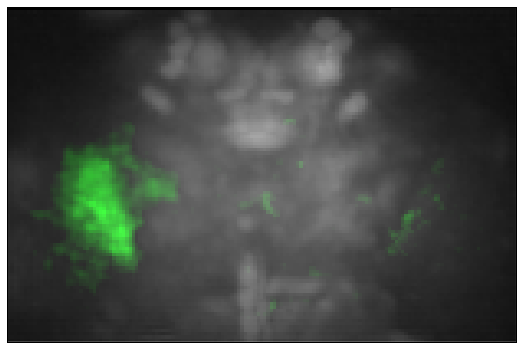

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


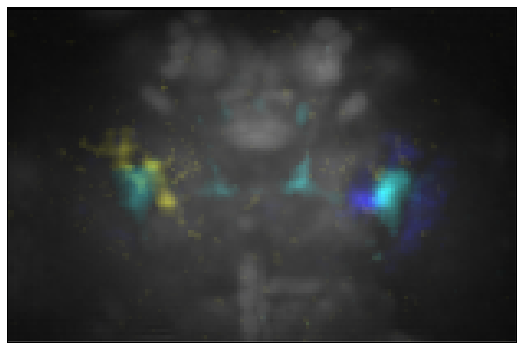

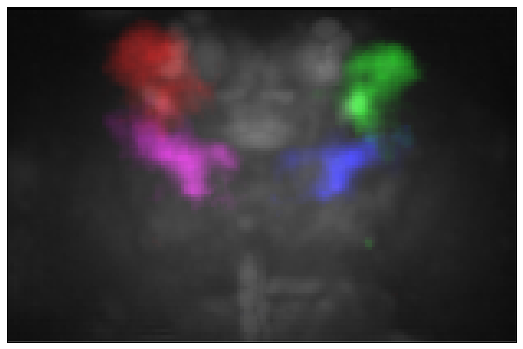

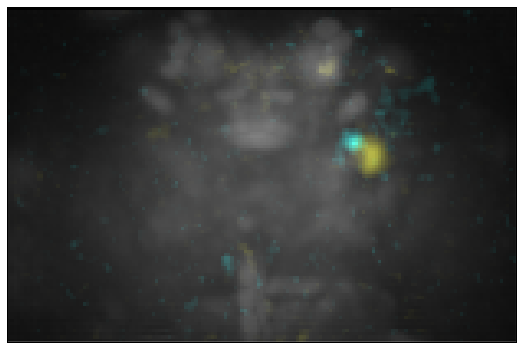

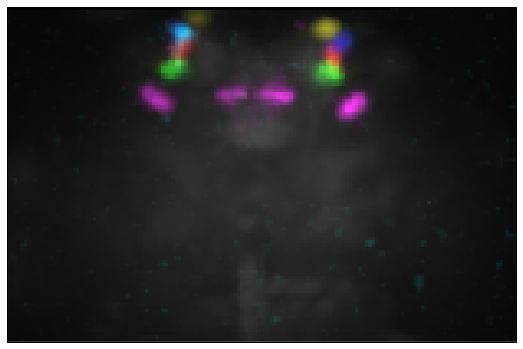

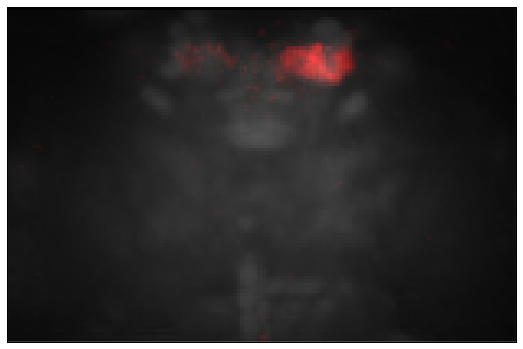

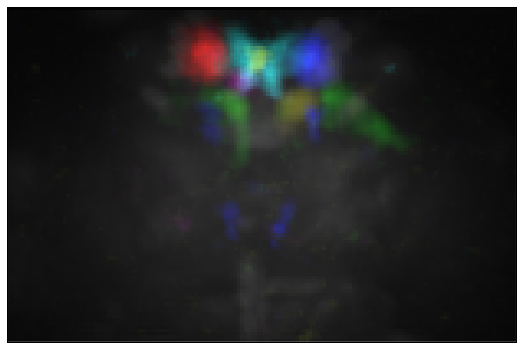

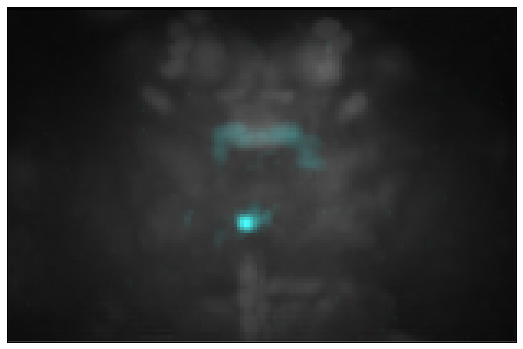

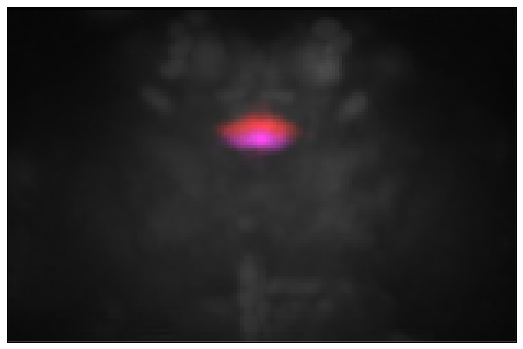

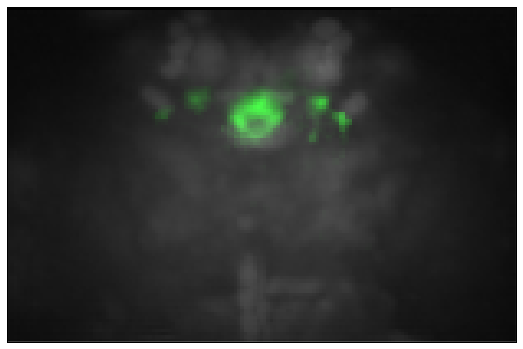

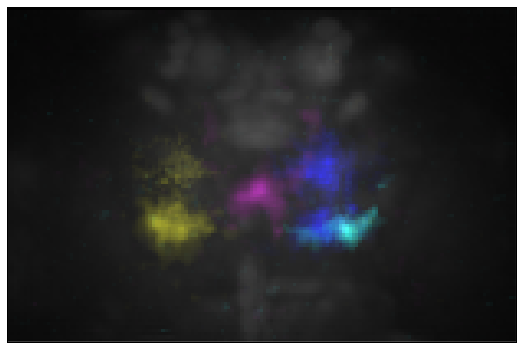

NameError: name 'Timeb' is not defined

In [350]:
pylab.rcParams['figure.figsize'] = (12, 6)
c=1

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[c%6][:]
            #print(j)
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                #M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]]),S[0]*S[1],5))
                #Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            #Final_map3=Final_map3+Fmaps3 
            c=c+1
                
    else:
        j=Sets[i]
        C[j,:]=C1[c%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
        c=c+1
        
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/600
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                               

In [342]:
Walk=X[:,1]+X[:,2]+X[:,0]
Walk[Walk>0]=1
Walk[Walk<0]=np.nan

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


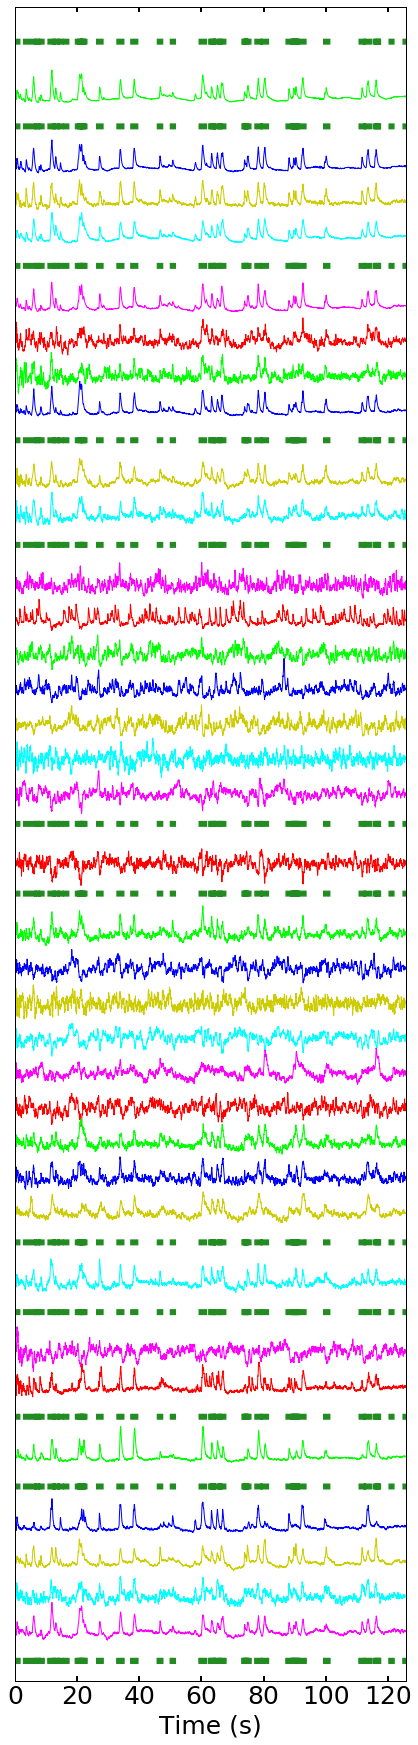

In [357]:
pylab.rcParams['figure.figsize'] = (7, 30)
h=7
l=0
c=1
plt.plot(Time_fluoICA,(Walk)+10,linewidth=6,color='forestgreen')

for i in range(len(Sets)):     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[c%6][:]
            plt.plot(Time_fluoICA,(DTo[:,J[j]]/np.sqrt(np.var(DTo[:,J[j]]))-h*l-h*i),color=C[j,:])
            l=l+1
            c=c+1
                
    else:
        j=Sets[i]
        C[j,:]=C1[c%6][:]
        plt.plot(Time_fluoICA,(DTo[:,J[j]]/np.sqrt(np.var(DTo[:,J[j]]))-h*l-h*i),color=C[j,:])
        l=l+1
        c=c+1
    plt.plot(Time_fluoICA,(Walk)-h*i-h*l,linewidth=6,color='forestgreen')
        
plt.plot(Time_fluoICA,(Walk)-h*i-h*l,linewidth=6,color='forestgreen')

plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-h*i-h*l+7-10,18])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
frame1.axes.set_xlabel('Time (s)')
frame1.xaxis.set_tick_params(width=2,length=5)
matplotlib.rcParams.update({'font.size': 25})
plt.savefig('/media/DataPaper/100142/100142imagegraph.svg')
plt.show()

In [331]:
X.shape

(12436, 3)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


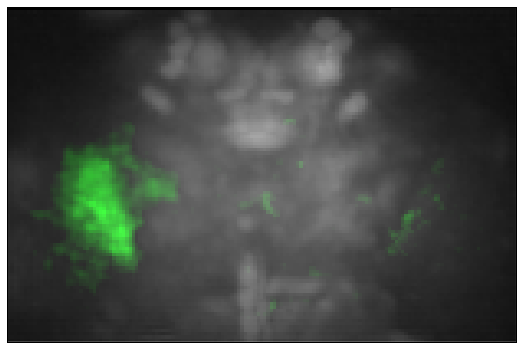

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


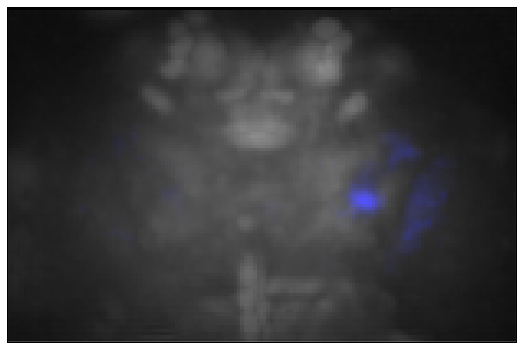

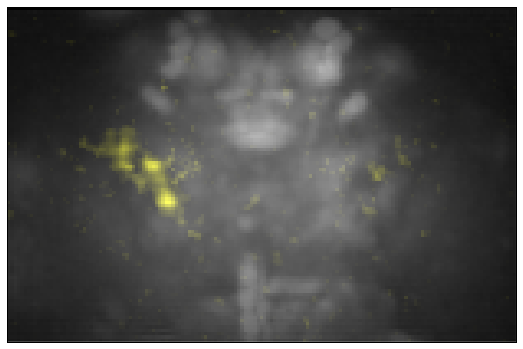

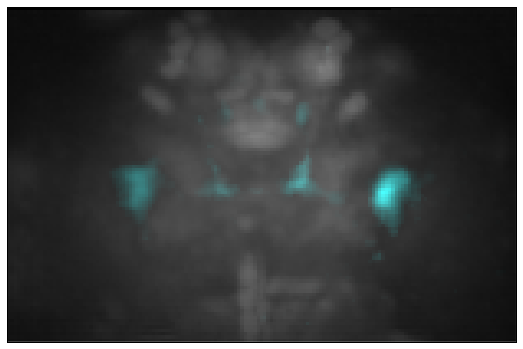

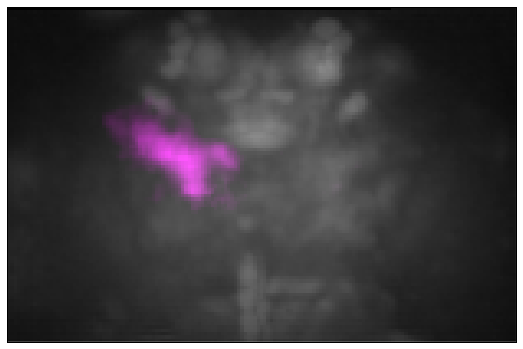

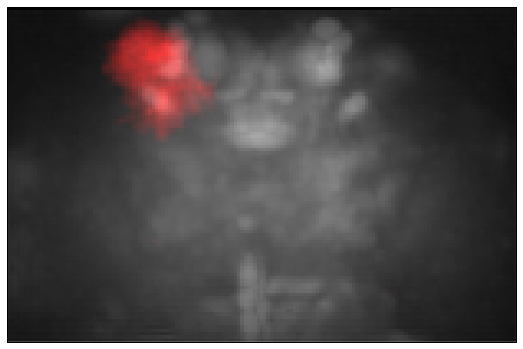

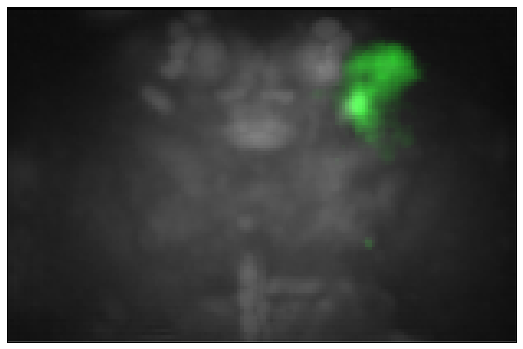

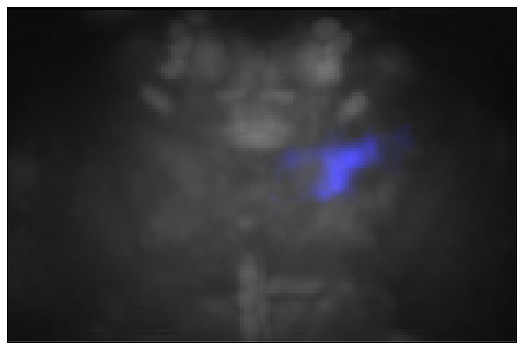

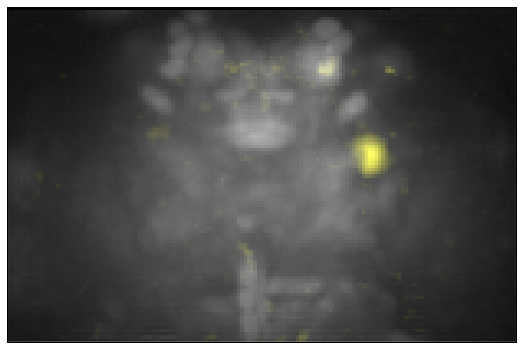

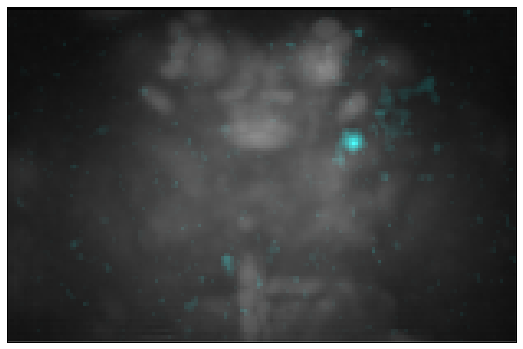

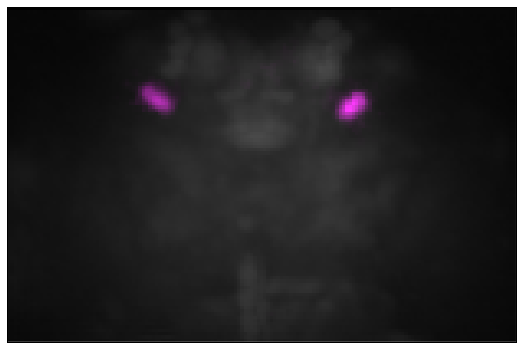

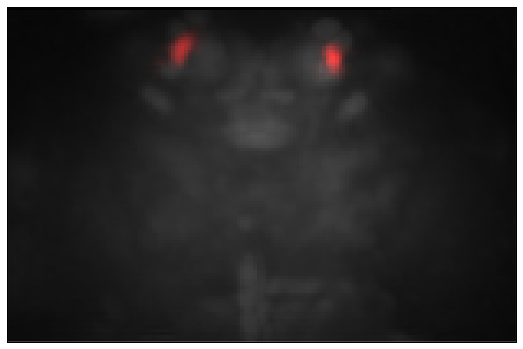

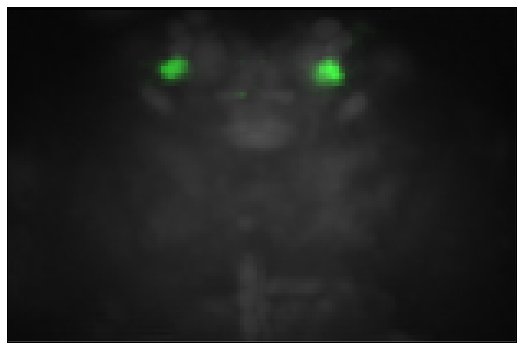

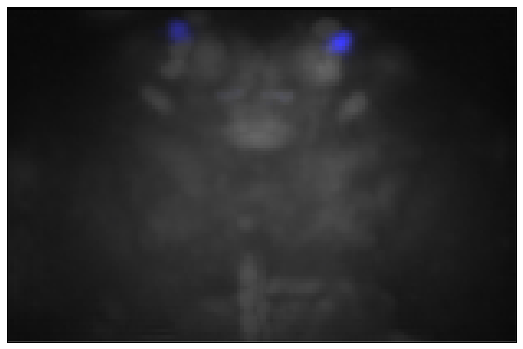

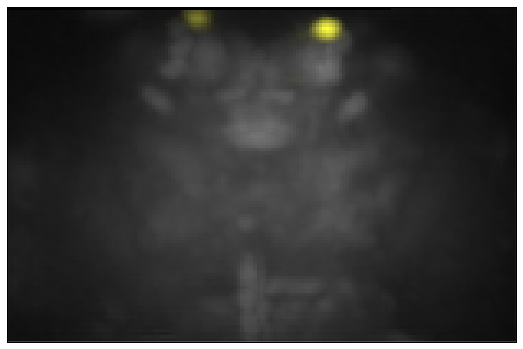

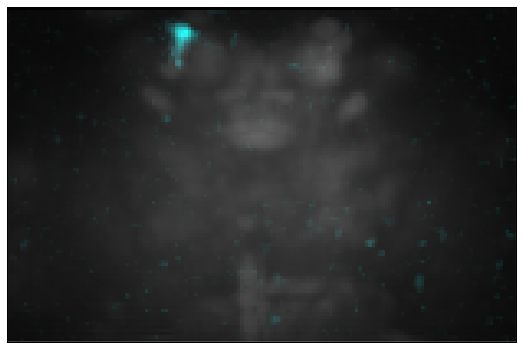

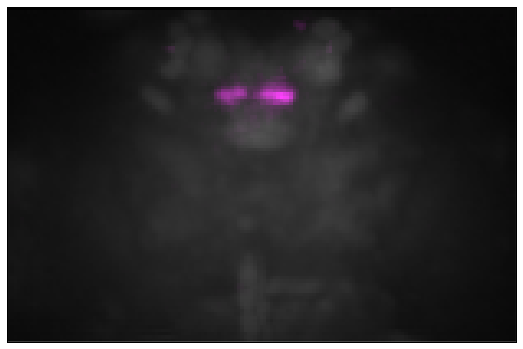

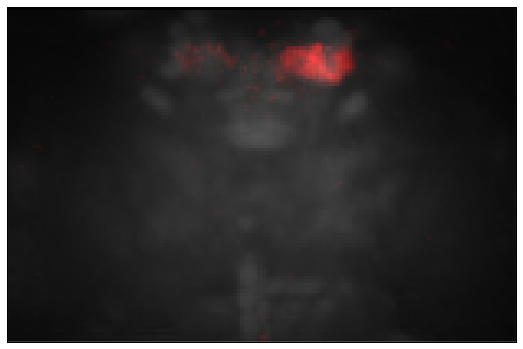

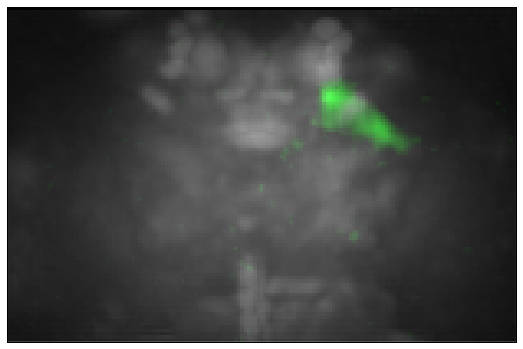

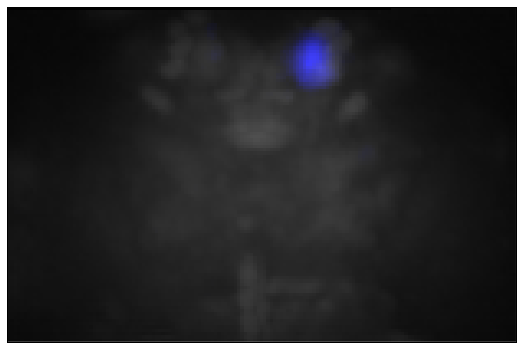

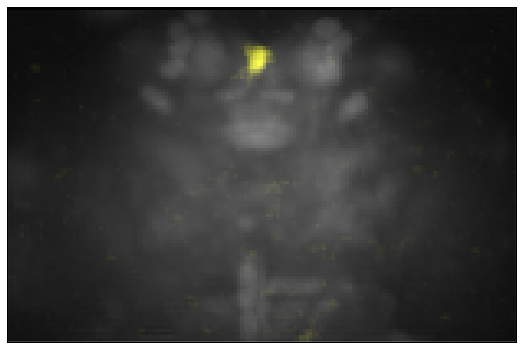

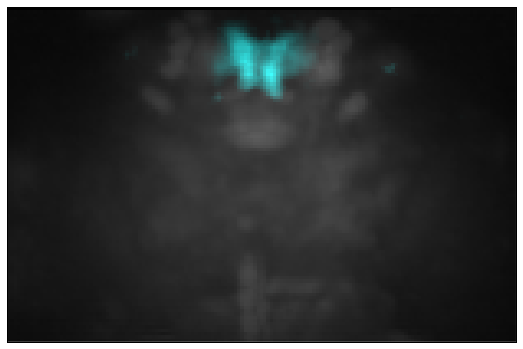

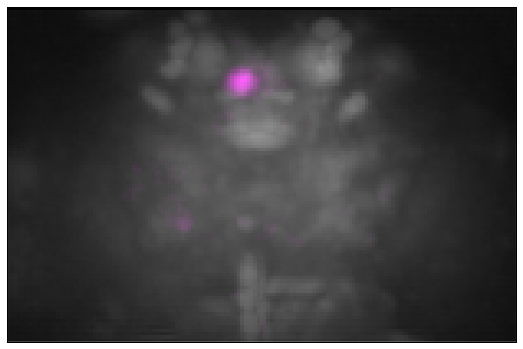

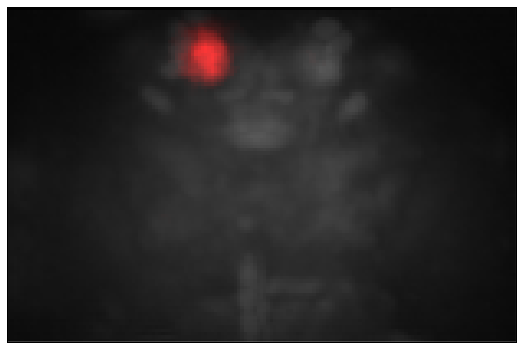

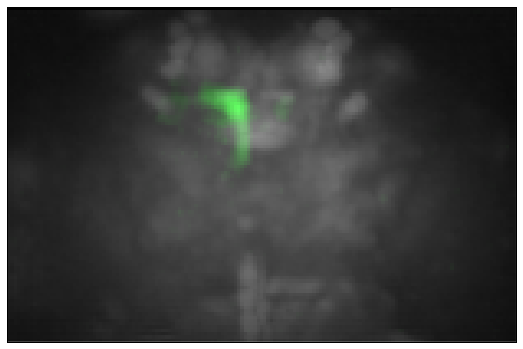

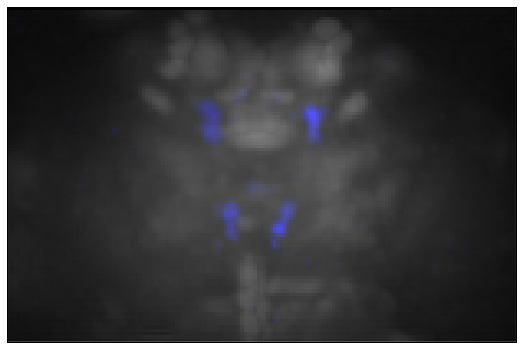

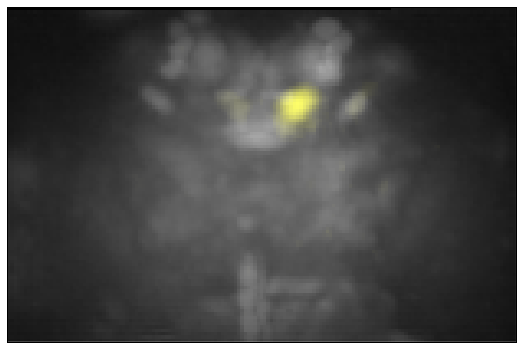

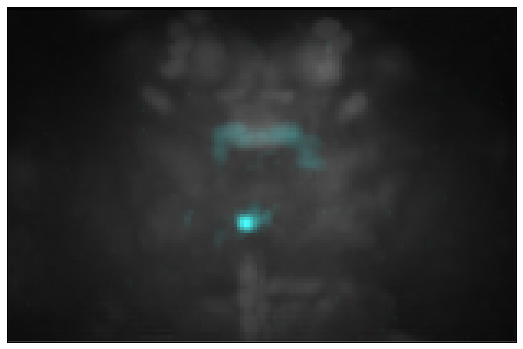

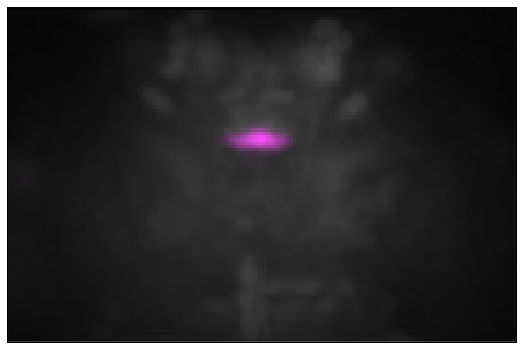

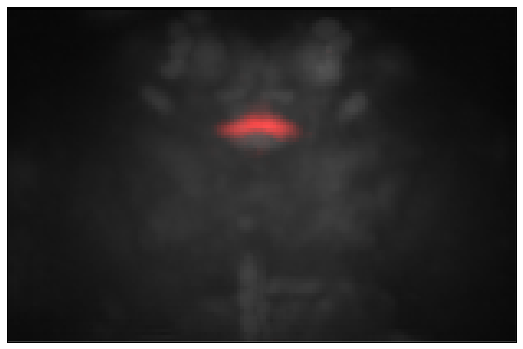

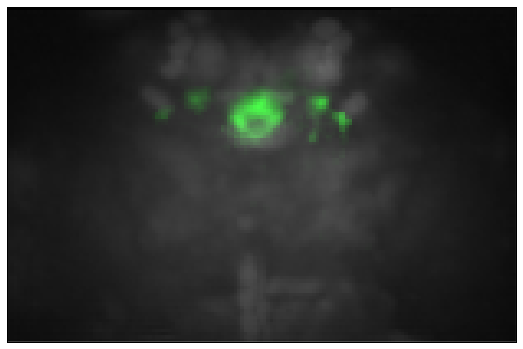

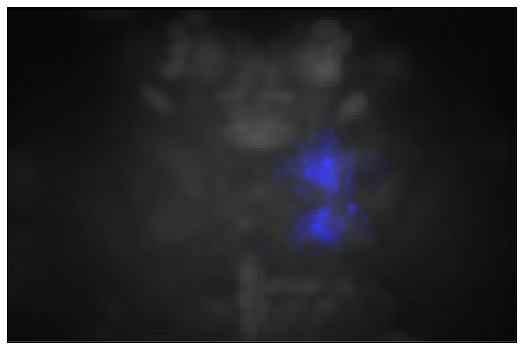

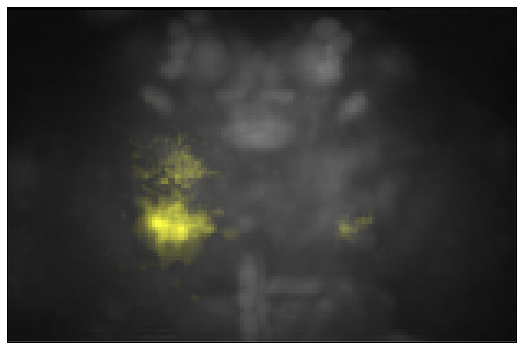

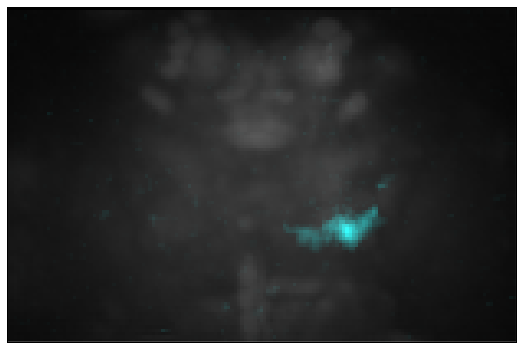

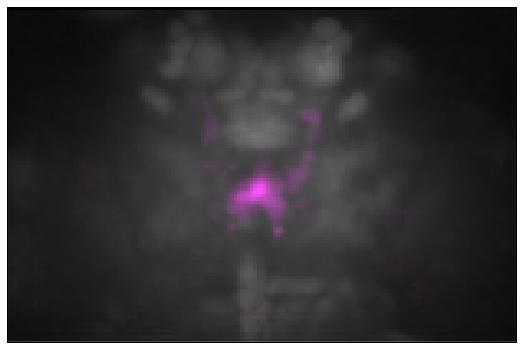

In [355]:
pylab.rcParams['figure.figsize'] = (12, 6)
c=1

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[c%6][:]
            #print(j)
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                #M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]]),S[0]*S[1],5))
                #Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            #Final_map3=Final_map3+Fmaps3 
            c=c+1
            Df=np.zeros([S[0],S[1],3]) 
            for l in range(3):
                Df[:,:,l]=Fmaps2[:,:,l]+np.mean(Dmean,2)/600
            MM=np.max(np.max(Df))

            Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
            a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
            plt.show()      
    else:
        j=Sets[i]
        C[j,:]=C1[c%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
        c=c+1
        Df=np.zeros([S[0],S[1],3]) 
        for l in range(3):
            Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/600
        MM=np.max(np.max(Df))

        Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
        a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        plt.show()
                

# Put onsets of walk together

(-1, 0)

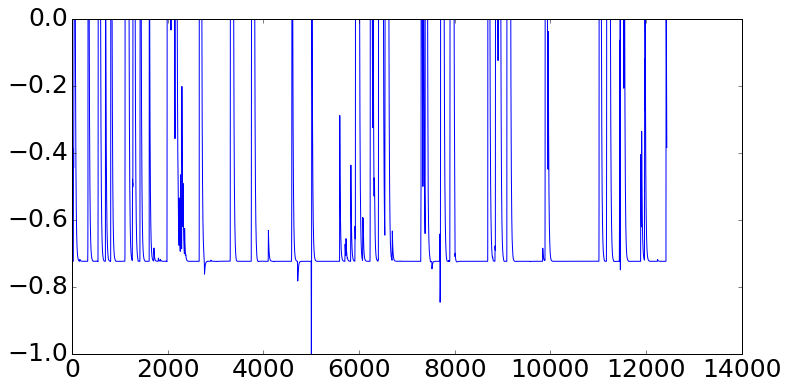

In [405]:
Walk3=X[:,1]+X[:,2]+X[:,0]
plt.plot(Walk3)
plt.ylim(-1,0)

In [406]:
Walk3[Walk3>-0.6]=1
Walk3[Walk3<-0.6]=0

In [425]:
Ion=[]
for i in range(25,(Time_fluoICA.shape[0]-25)):
    if (not Walk3[range(i-20,i)].any()) and Walk3[range(i,i+20)].all():
        Ion.append(i)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


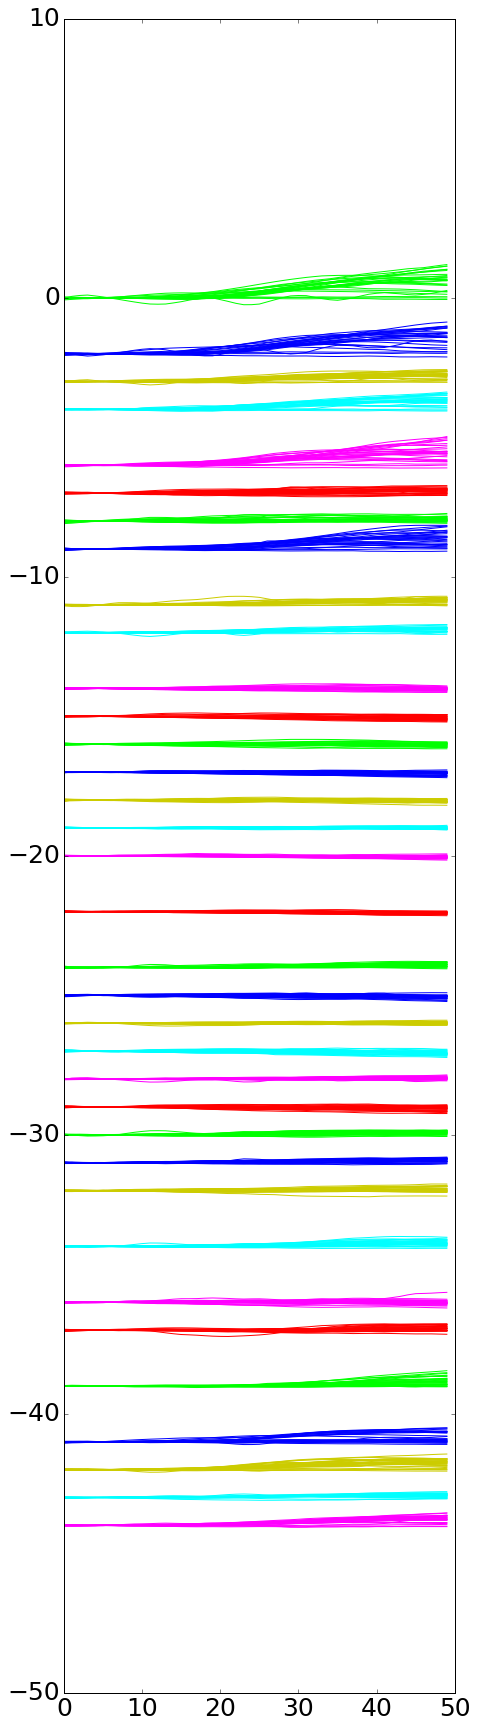

In [435]:
pylab.rcParams['figure.figsize'] = (7, 30)
c=1
l=0
m=0
for i in range(len(Sets)):   
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[c%6][:]
            for k in range(len(Ion)):
                Ts=DTo[range(Ion[k]-25,Ion[k]+25),J[j]]
                Tsm=Ts-np.mean(Ts[range(10)])
                #plt.plot(Time_fluoICA,(DTo[:,J[j]]/np.sqrt(np.var(DTo[:,J[j]]))-h*l-h*i),color=C[j,:])
                plt.plot((-l-m+Tsm),color=C[j,:])
            c=c+1
            l=l+1
        m=m+1
                  
    else:
        j=Sets[i]
        C[j,:]=C1[c%6][:]
        for k in range(len(Ion)):
            Ts=DTo[range(Ion[k]-25,Ion[k]+25),J[j]]
            Tsm=Ts-np.mean(Ts[range(10)])
                #plt.plot(Time_fluoICA,(DTo[:,J[j]]/np.sqrt(np.var(DTo[:,J[j]]))-h*l-h*i),color=C[j,:])
            plt.plot((-l-m+Tsm),color=C[j,:])
        l=l+1
        c=c+1
        m=m+1
        

  
plt.show()



In [ ]:
 Virtual Fly Brain 
    Images of fragments of P{Trh-GAL4.long} expression pattern AND Images of neurons with some part in anterior ventrolateral protocerebrum